In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Đọc file CSV
file_path = 'NLP DATASET.csv'  # Đường dẫn tới file CSV của bạn
data = pd.read_csv(file_path)
# 2. Kiểm tra định dạng dữ liệu
print("Dữ liệu ban đầu:")
print(data.head())
print("\nCác nhãn duy nhất trong dữ liệu:")
print(data['Label'].unique())


Dữ liệu ban đầu:
   STT                                           Question     Label
0    1                    Vì sao mèo ăn những vật thể lạ?       Why
1    2      Bạn đã chạy được bao nhiêu km trong tuần này?  Quantity
2    3  Tôi tính làm tủ áo cánh kính cửa lùa, có nên l...    Yes/No
3    4  Cách phòng ngừa và điều trị Búi lông “Hairball...       How
4    5  Bạn đã tham gia bao nhiêu buổi tư vấn nghề ngh...  Quantity

Các nhãn duy nhất trong dữ liệu:
['Why' 'Quantity' 'Yes/No' 'How' 'Who' 'Where' 'What' 'When']


In [2]:
from underthesea import word_tokenize
def preprocess_text(text):
    text = word_tokenize(text, format="text")  # Tách từ tiếng Việt
    text = text.lower()  # Chuyển về chữ thường
    return text

data['Question'] = data['Question'].apply(preprocess_text)
data.to_csv("Data/Processed_data/lstm_processed_data", index=False)

In [5]:
# Tách dữ liệu thành X (câu hỏi) và y (nhãn)
X = data['Question']
y = data['Label']


# Chia tập dữ liệu thành train và test
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

train_data = pd.DataFrame({'Question': X_train, 'Label': y_train})
val_data = pd.DataFrame({'Question': X_val, 'Label': y_val})
test_data = pd.DataFrame({'Question': X_test, 'Label': y_test})

# train_data.to_csv("Data/Train_Test_Val/train_data.csv", index=False)
# val_data.to_csv("Data/Train_Test_Val/val_data.csv", index=False)
# test_data.to_csv("Data/Train_Test_Val/test_data.csv", index=False)


print("Số lượng mẫu train:", len(X_train))
print("Số lượng mẫu test:", len(X_test))
print("Số lượng mẫu valid:", len(X_val))

Số lượng mẫu train: 768
Số lượng mẫu test: 240
Số lượng mẫu valid: 192


In [8]:
# Mã hóa nhãn thành số
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Khởi tạo Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Chuyển văn bản thành chuỗi số
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_val_seq = tokenizer.texts_to_sequences(X_val)

# Đệm các chuỗi để có cùng độ dài
max_length = 50  # Giới hạn độ dài câu
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post')
X_val_padded = pad_sequences(X_val_seq, maxlen=max_length, padding='post')

# Kích thước từ điển
vocab_size = len(tokenizer.word_index) + 1
print("Số lượng từ trong từ điển:", vocab_size)


Số lượng từ trong từ điển: 1019


In [9]:
import fasttext

# Load FastText model từ file .bin
model = fasttext.load_model('cc.vi.300.bin')


In [10]:
print(model.get_word_vector('giá'))  # Lấy thử vector của từ "giá"

[-1.22661091e-01  5.53636700e-02  1.41800478e-01  2.95930430e-02
 -8.27335566e-02 -5.50692640e-02 -4.30196524e-02 -2.86210012e-02
  6.81398809e-03 -8.39588344e-02 -5.96411936e-02  1.42467842e-02
 -1.48809537e-01 -4.79608923e-02 -5.97199649e-02 -3.35736163e-02
  8.58044401e-02 -1.00587510e-01 -7.94519261e-02 -8.71512964e-02
  2.08056364e-02  2.36146394e-02  8.23296383e-02 -8.33525285e-02
  3.77636999e-02  5.23726568e-02  3.54800746e-02 -4.42538597e-02
  7.16536939e-02 -1.62647814e-01  7.43294656e-02  1.16684809e-01
 -7.64077231e-02 -8.51804018e-02 -3.61620262e-02 -9.03779045e-02
 -1.81313902e-02 -1.05658799e-01  1.35168731e-02  9.71468315e-02
 -4.03170474e-02  3.45492736e-02 -7.48830661e-02  8.72363336e-03
  9.43266004e-02  7.62426257e-02  8.72331560e-02 -2.75415480e-02
  1.46978237e-02 -7.19945133e-03  1.11510210e-01 -3.43572088e-02
  2.73421183e-02  1.02511436e-01 -1.04237944e-01 -3.46672311e-02
  1.58031583e-02 -4.98940386e-02 -2.75668688e-02  8.98529887e-02
 -4.55422811e-02 -1.39262

In [11]:
import numpy as np

# Khởi tạo embedding_matrix
embedding_matrix = np.zeros((vocab_size, 300))  # vocab_size là kích thước từ điển

# Tạo embedding matrix từ FastText
for word, idx in tokenizer.word_index.items():
    if idx < vocab_size:  # Đảm bảo chỉ số không vượt quá vocab_size
        embedding_matrix[idx] = model.get_word_vector(word)

print("Embedding matrix đã được khởi tạo.")
print("Shape của embedding matrix:", embedding_matrix.shape)


Embedding matrix đã được khởi tạo.
Shape của embedding matrix: (1019, 300)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.regularizers import l2

# Xây dựng mô hình
model = Sequential([
    Embedding(input_dim=vocab_size, 
              output_dim=300, 
              weights=[embedding_matrix], 
              input_shape=(max_length,),  
              trainable=False),
    Bidirectional(LSTM(units=128, return_sequences=False)),
    Dropout(0.5),
    Dense(units=64, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(units=8, activation='softmax')
])

# Compile mô hình
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Kiểm tra cấu trúc mô hình
model.summary()




/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 50, 300)        │       305,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 256)            │       439,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 761,964 (2.91 MB)

 Trainable params: 456,264 (1.74 MB)

 Non-trainable params: 305,700 (1.17 MB)

In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

history = model.fit(
    X_train_padded,
    y_train_encoded,
    epochs=30,
    batch_size=16,
    validation_data=(X_val_padded, y_val_encoded),
    callbacks=[reduce_lr,early_stopping]
    
)


Epoch 1/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.2088 - loss: 2.8657 - val_accuracy: 0.6406 - val_loss: 2.1239 - learning_rate: 0.0010
Epoch 2/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5958 - loss: 1.8373 - val_accuracy: 0.7604 - val_loss: 1.1897 - learning_rate: 0.0010
Epoch 3/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7448 - loss: 1.1185 - val_accuracy: 0.8073 - val_loss: 0.9605 - learning_rate: 0.0010
Epoch 4/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8264 - loss: 0.8586 - val_accuracy: 0.8385 - val_loss: 0.7524 - learning_rate: 0.0010
Epoch 5/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8795 - loss: 0.6909 - val_accuracy: 0.8698 - val_loss: 0.6867 - learning_rate: 0.0010
Epoch 6/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9172 - loss: 0.5308 - val_accuracy: 0.7812 - val_loss: 0.8032 - learning_rate: 0.0010
Epoch 7/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9100 - loss: 0.5045 - val_acc

In [14]:
# Đánh giá mô hình trên tập kiểm tra
loss, accuracy = model.evaluate(X_test_padded, y_test_encoded)
print(f"Độ chính xác trên tập kiểm tra: {accuracy * 100:.2f}%")


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8581 - loss: 0.5615
Độ chính xác trên tập kiểm tra: 87.08%


In [15]:
def predict_question(question):
    # Tokenize và pad câu hỏi
    sequence = tokenizer.texts_to_sequences([question])
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')
    
    # Dự đoán
    prediction = model.predict(padded_sequence)
    predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])
    return predicted_label[0]

# Dự đoán câu hỏi mới
new_question = "Tôi muốn biết tổng thống nước Mỹ bây giờ là ai?"
print("Loại câu hỏi:", predict_question(new_question))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Loại câu hỏi: Who


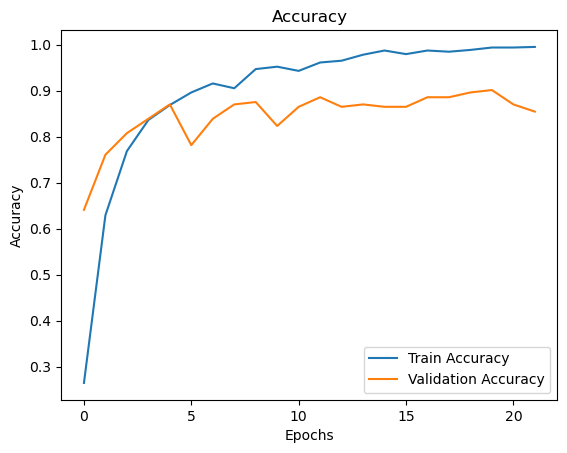

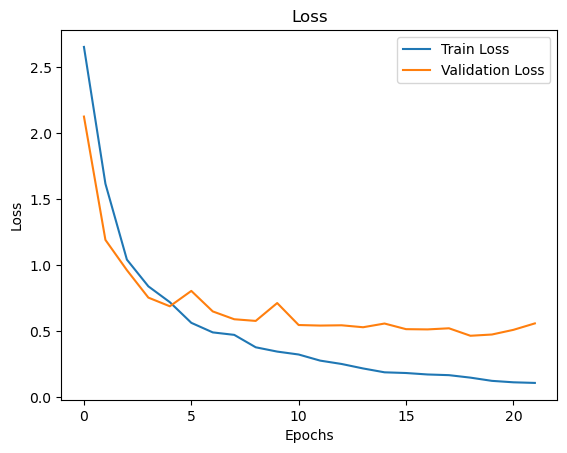

In [16]:
import matplotlib.pyplot as plt

# Vẽ đồ thị accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Vẽ đồ thị loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [17]:
model.save('lstm_fasttext_model.h5')
import joblib
joblib.dump(tokenizer, 'tokenizer.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')


['label_encoder.pkl']